In [48]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [49]:
os.chdir("/Users/Dippies/CODE PACKT - EML/Chapter 3/Naive Bayes")
os.getcwd()

'/Users/Dippies/CODE PACKT - EML/Chapter 3/Naive Bayes'

In [ ]:
os.chdir(".../Chapter 3/Naive Bayes")
os.getcwd()

In [50]:
df_messages = pd.read_csv('spam.csv', encoding='latin-1', \
                          sep=',', names=['labels','message'])

In [51]:
df_messages.head(3)

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [52]:
df_messages.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [53]:
df_messages.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

### Number of words & number of characters

In [54]:
df_messages['word_count'] = df_messages['message'].apply(lambda x: len(str(x).split(" ")))
df_messages['character_count'] = df_messages['message'].str.len() 

df_messages[['message','word_count', 'character_count']].head()

,message,word_count,character_count
0,"Go until jurong point, crazy.. Available only ...",20,111
1,Ok lar... Joking wif u oni...,6,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,28,155
3,U dun say so early hor... U c already then say...,11,49
4,"Nah I don't think he goes to usf, he lives aro...",13,61


/Users/Dippies/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


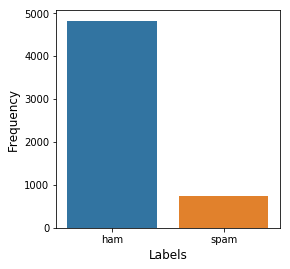

In [55]:
labels_count = pd.DataFrame(df_messages.groupby('labels')['message'].count())
labels_count.reset_index(inplace = True)
plt.figure(figsize=(4,4))
sns.barplot(labels_count['labels'], labels_count['message'])
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Labels', fontsize=12)
plt.show()

In [56]:
class_labels = {"ham":0,"spam":1}
df_messages['labels']=df_messages['labels'].map(class_labels)
df_messages.head()

,labels,message,word_count,character_count
0,0,"Go until jurong point, crazy.. Available only ...",20,111
1,0,Ok lar... Joking wif u oni...,6,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,155
3,0,U dun say so early hor... U c already then say...,11,49
4,0,"Nah I don't think he goes to usf, he lives aro...",13,61


#### CountVectorizer

In [57]:
# Split your data into train & test set
X_train, X_test, Y_train, Y_test = train_test_split(df_messages['message'],df_messages['labels'],test_size=0.3, random_state=1)

In [58]:
X_test.shape

(1672,)

In [59]:
# Creating an instance of the CountVectorizer class
# If ‘english’, a built-in stop word list for English is used. 
# There are known issues with ‘english’ and you should consider an alternative
vectorizer = CountVectorizer(lowercase=True, stop_words='english', analyzer='word')

# Learn a vocabulary from one or more message using the fit_transform() function
vect_train = vectorizer.fit_transform(X_train)

In [60]:
# Create an instance of MultinomialNB()
model_nb = MultinomialNB()

# Fit your data to the model
model_nb.fit(vect_train,Y_train)

# Use predict() to predict target class
predict_train = model_nb.predict(vect_train)

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [62]:
# Calculate Train Accuracy
print('Accuracy score: {}'.format(accuracy_score(Y_train, predict_train)))

# Calculate other metrics on your train results
print('Precision score: {}'.format(precision_score(Y_train, predict_train)))
print('Recall score: {}'.format(recall_score(Y_train, predict_train)))
print('F1 score: {}'.format(f1_score(Y_train, predict_train)))

Accuracy score: 0.9951282051282051
Precision score: 0.9775280898876404
Recall score: 0.9867674858223062
F1 score: 0.9821260583254938


In [63]:
# We apply the model into our test data
vect_test = vectorizer.transform(X_test)
prediction = model_nb.predict(vect_test)

# Calculate Test Accuracy
print('Accuracy score: {}'.format(accuracy_score(Y_test, prediction)))

# Calculate other metrics on your test data
print('Precision score: {}'.format(precision_score(Y_test, prediction)))
print('Recall score: {}'.format(recall_score(Y_test, prediction)))
print('F1 score: {}'.format(f1_score(Y_test, prediction)))

Accuracy score: 0.9850478468899522
Precision score: 0.957345971563981
Recall score: 0.926605504587156
F1 score: 0.9417249417249418
